# Reading Handwritten Digits with Tensorflow

What we're doing:
https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

2024-05-15 09:58:30.977847: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 09:58:31.004619: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 09:58:31.004651: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 09:58:31.004675: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 09:58:31.009756: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 09:58:31.010215: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
## Do I have GPUs?
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Read in the data

X is the image, y is the label

In [3]:
(train_x,train_y), (test_x,test_y) = mnist.load_data()

In [4]:
type(train_x)

numpy.ndarray

## What Does an Image look like?

In [5]:
print(train_x.shape, train_y.shape,test_x.shape,test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
# Prepare the data for training

In [7]:
train_x = train_x / 255
test_x = test_x / 255

In [8]:
#print(train_x[0])
train_x[0].shape

(28, 28)

In [9]:
# graphit(the data to graph, the answers, # of rows of graph grid, # of cols of graph grid, where to start in the data, size of graph)
def graphit(images, labels, rows=1, cols=1, start=0, zoom=2):
   #The number of images we have to graph
  n_images = rows * cols
    #Make a graph the correct size
  fig, ax = plt.subplots(rows,cols,figsize=(cols * zoom, rows * zoom))
    # For every graph we need to make
  for n in range(n_images):
    plt.subplot(rows, cols, n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[n+start], cmap=plt.cm.binary)
    # plt.imshow(images[n])
    plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]))
  plt.show()

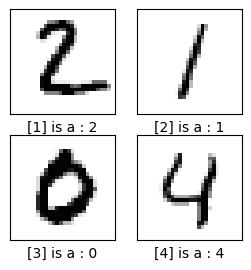

In [10]:
graphit(test_x,test_y,2,2,1,zoom=1.5)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="softmax")
])

## Compile the Model

In [12]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [13]:
# model.fit(train_x,train_y,epochs=10)
train_y.size

60000

In [14]:
history = model.fit(train_x,train_y,epochs=100,batch_size=1024)

Epoch 1/100


2024-05-15 09:58:33.840294: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


59/59 [==============================] - 1s 4ms/step - loss: 1.0120 - accuracy: 0.7062
Epoch 2/100
59/59 [==============================] - 0s 4ms/step - loss: 0.3678 - accuracy: 0.8910
Epoch 3/100
59/59 [==============================] - 0s 4ms/step - loss: 0.2850 - accuracy: 0.9174
Epoch 4/100
59/59 [==============================] - 0s 4ms/step - loss: 0.2348 - accuracy: 0.9315
Epoch 5/100
59/59 [==============================] - 0s 4ms/step - loss: 0.2053 - accuracy: 0.9406
Epoch 6/100
59/59 [==============================] - 0s 4ms/step - loss: 0.1802 - accuracy: 0.9472
Epoch 7/100
59/59 [==============================] - 0s 4ms/step - loss: 0.1630 - accuracy: 0.9527
Epoch 8/100
59/59 [==============================] - 0s 4ms/step - loss: 0.1477 - accuracy: 0.9580
Epoch 9/100
59/59 [==============================] - 0s 4ms/step - loss: 0.1357 - accuracy: 0.9606
Epoch 10/100
59/59 [==============================] - 0s 4ms/step - loss: 0.1249 - accuracy: 0.9635
Epoch 11/100
59/59 [=

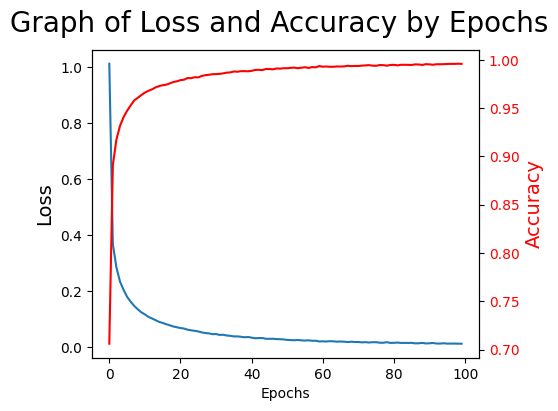

In [15]:
#list the number of epoch from the history object
x_values=np.arange(len(history.history["loss"]))

fig,ax1 = plt.subplots(figsize=(5,4))
fig.suptitle("Graph of Loss and Accuracy by Epochs",fontsize=20)
ax1.set_xlabel("Epochs")

ax1.set_ylabel("Loss",color="black",fontsize=14)
plot_1=ax1.plot(x_values,history.history["loss"],label="Loss")
ax1.tick_params(axis="y",labelcolor="black")

#adding twin axes

ax2 = ax1.twinx()
ax2.set_ylabel("Accuracy",color="red",fontsize=14)
plot_2=ax2.plot(x_values,history.history["accuracy"],label="Loss",color="red")
ax2.tick_params(axis="y",labelcolor="red")

plt.show()

In [16]:
test_loss,test_acc=model.evaluate(test_x,test_y,verbose=3)

print("\nTest accuracy:",test_acc*100,"%")


Test accuracy: 97.97999858856201 %


## Predictions

#28x28 images

In [17]:
predictions = model.predict(test_x)

313/313 [==============================] - 0s 793us/step


In [18]:
predictions[0]

array([2.6936222e-08, 1.7403623e-14, 7.1975342e-07, 1.5363073e-06,
       5.0792657e-18, 7.5921547e-11, 2.7649221e-18, 9.9999279e-01,
       4.7733506e-10, 4.8899460e-06], dtype=float32)

In [19]:
test_y[0]

7

In [20]:
predictions[0].argmax()

7

In [21]:
wrong = []
for i in range(len(predictions)):
    if predictions[i].argmax() != test_y[i]:
        wrong.append(i)

(10000-len(wrong))/10000

0.9798

In [22]:
print(wrong)

[247, 321, 445, 447, 495, 582, 619, 684, 691, 720, 844, 947, 951, 956, 965, 1014, 1039, 1044, 1050, 1112, 1114, 1156, 1182, 1226, 1232, 1242, 1247, 1260, 1289, 1319, 1328, 1393, 1494, 1500, 1522, 1530, 1549, 1554, 1609, 1621, 1681, 1709, 1717, 1737, 1754, 1790, 1828, 1878, 1901, 1941, 2004, 2035, 2043, 2053, 2109, 2118, 2135, 2182, 2185, 2224, 2272, 2293, 2326, 2329, 2369, 2387, 2406, 2422, 2462, 2488, 2610, 2648, 2654, 2720, 2730, 2742, 2810, 2877, 2896, 2915, 2927, 2930, 2939, 2953, 2970, 3005, 3073, 3117, 3225, 3289, 3503, 3520, 3549, 3558, 3559, 3567, 3597, 3604, 3751, 3776, 3780, 3796, 3808, 3838, 3853, 3869, 3902, 3906, 3941, 3943, 3951, 3976, 4027, 4065, 4075, 4078, 4156, 4176, 4199, 4201, 4205, 4248, 4269, 4289, 4360, 4419, 4425, 4477, 4497, 4500, 4504, 4536, 4547, 4575, 4601, 4639, 4731, 4740, 4751, 4761, 4783, 4807, 4823, 4833, 4880, 4890, 4950, 4956, 4966, 5078, 5140, 5331, 5457, 5642, 5676, 5749, 5842, 5887, 5936, 5955, 5973, 6011, 6023, 6045, 6059, 6166, 6555, 6559, 6571, 

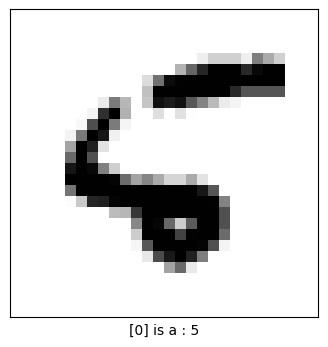

In [23]:
n=8
predict=[]
predict.append(predictions[n].argmax())
imgs = []
imgs.append(test_x[n])
graphit(imgs,predict,1,1,0,zoom=4)

In [24]:
# Build data to graph the wrong ones

In [25]:
imgs,labels,predicts=[],[],[]
for i in range(25):
    imgs.append(test_x[wrong[i]])
    labels.append(test_y[wrong[i]])
    predicts.append(predictions[i].argmax())


#predict.append(predictions[n].argmax())
#imgs = []
#imgs.append(test_x[n])

In [26]:
# graphit(the data to graph, the answers, # of rows of graph grid, # of cols of graph grid, where to start in the data, size of graph)
def graph_predictions(images, labels, predictions, rows=1, cols=1, start=0, zoom=2):
   #The number of images we have to graph
  n_images = rows * cols
    #Make a graph the correct size
  fig, ax = plt.subplots(rows,cols,figsize=(cols * zoom, rows * zoom))
    # For every graph we need to make
  for n in range(n_images):
    plt.subplot(rows, cols, n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[n+start], cmap=plt.cm.binary)
    # plt.imshow(images[n])
    plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]) + " looks like : " + str(predictions[n+start]))
  plt.show()

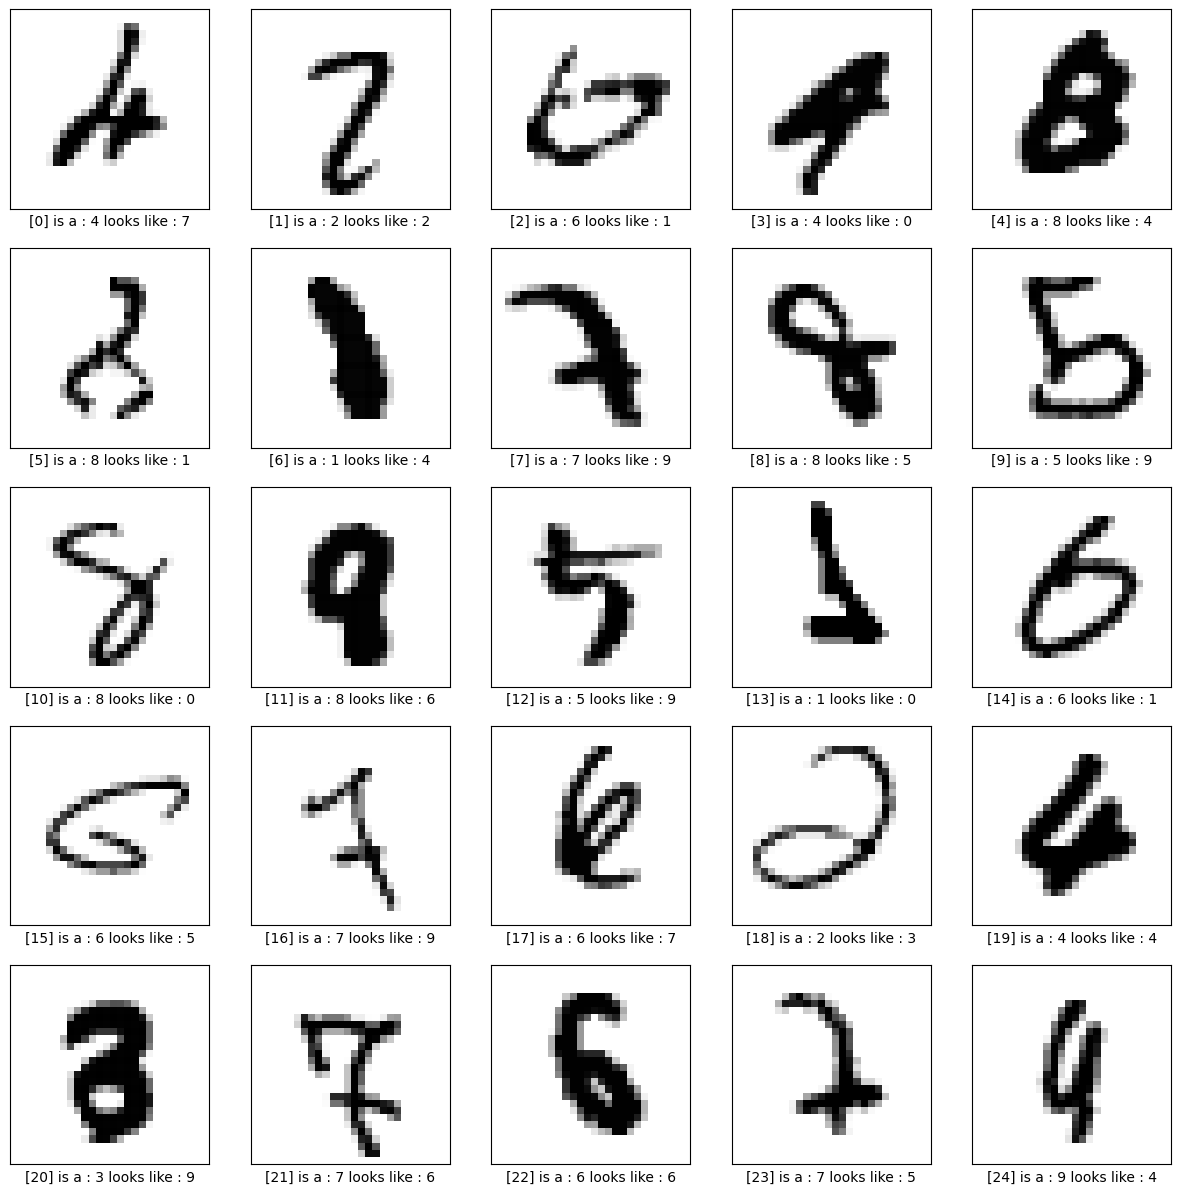

In [27]:
graph_predictions(imgs,labels,predicts,5,5,0,zoom=3)

## Save the model

In [28]:
model.save("HandWriting_model.keras")